Importing libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 


                            
     

Load dataset

In [6]:
file_path = 'Kathmandu.csv'
data = pd.read_csv(file_path)

convert data_and_time column to datetime

In [7]:
data['date_and_time'] = pd.to_datetime(data['date_and_time'], errors='coerce')

Missing values

In [8]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
date_and_time    0
PM2.5            0
O3               0
TEMPERATURE      0
PRESSURE         0
DEWPOINT         0
RAIN             0
dtype: int64


In [ ]:
#drop row with missing values
data = data.dropna()

In [11]:
#sorting data
data = data.sort_values(by='date_and_time').reset_index(drop=True)

In [12]:
numeric_columns = ['PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [15]:
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [16]:
data.to_csv('preprocessed_dataset.csv', index=False)


In [17]:
print("Data preprocessing complete. Cleaned dataset saved as 'preprocessed_dataset.csv'.")


Data preprocessing complete. Cleaned dataset saved as 'preprocessed_dataset.csv'.


DATA EXPLORATION

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot Distributions

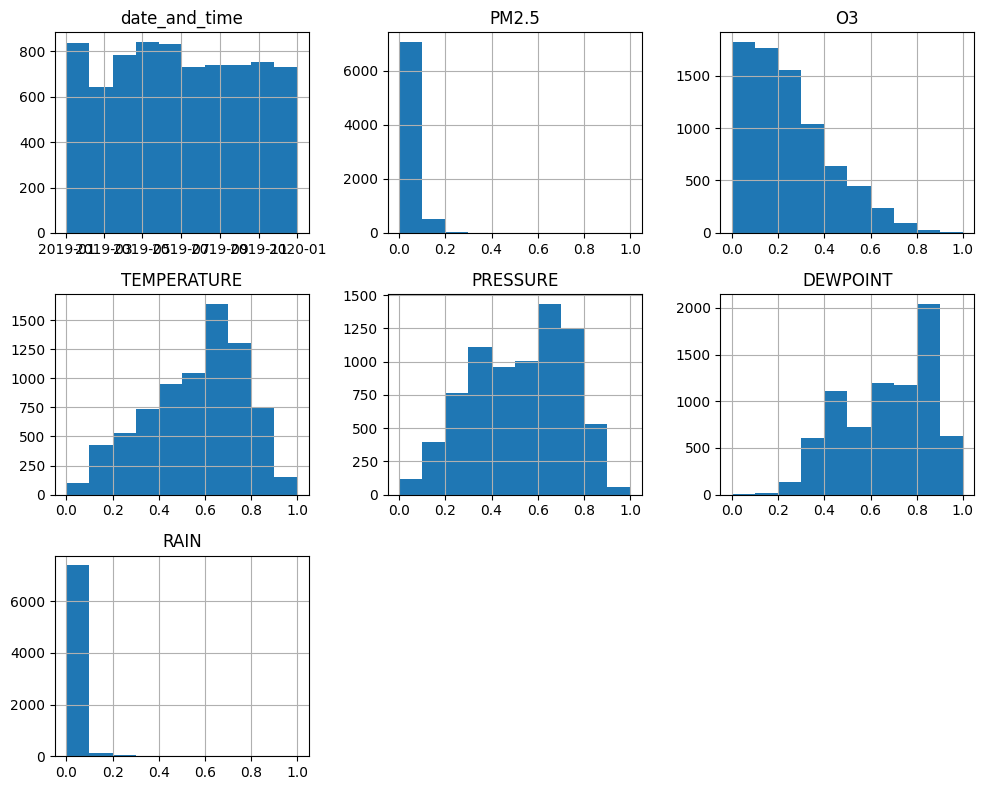

In [20]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

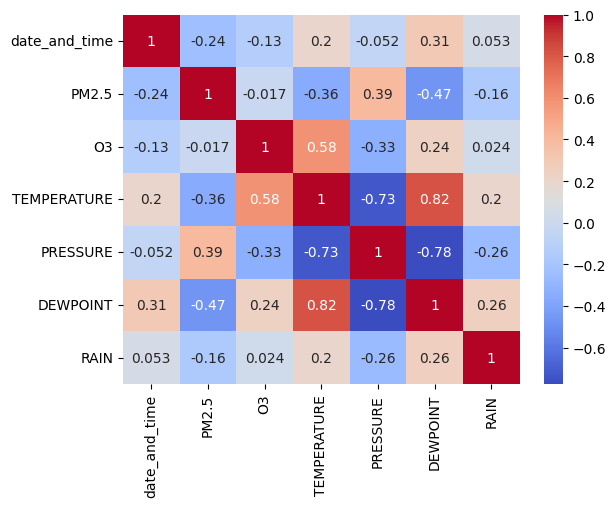

In [21]:
#correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

SPLITTING THE DATA

In [22]:
from sklearn.model_selection import train_test_split

X = data[['PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']]  # Features
y = data['PM2.5']  # Target variable (can be adjusted based on your focus)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


FEATURE ENGINEERING

In [23]:
def create_lags(df, col, lags):
    for lag in range(1, lags + 1):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)
    return df

# Add lag features for 'PM2.5'
data = create_lags(data, 'PM2.5', lags=3)
data.dropna(inplace=True)


LSTM training

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0024
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9253e-04
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2075e-04
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0853e-04
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9192e-05
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7911e-05
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9713e-05
Epoch 10/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5779e-05
Epoch 11/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1672e-05
Epoch 12/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6728e-05
Epoch 13/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4758e-05
Epoch 14/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1637e-05
Epoch 15/50
191/191 ━━━

MODEL EVALUTAION

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model_lstm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.0011590447432863733, RMSE: 0.001570560591237533


VISUALIZATION

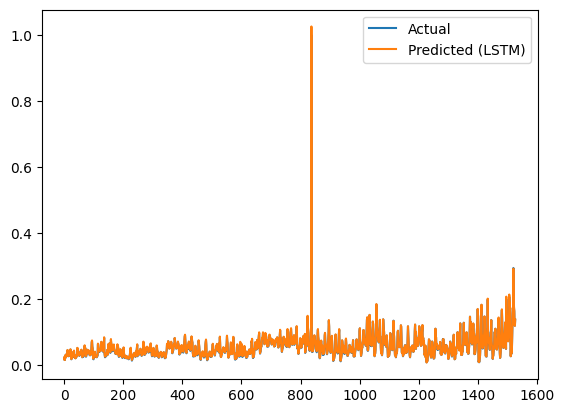

In [30]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted (LSTM)')
plt.legend()
plt.show()



In [2]:
import pandas as pd

# Load your dataset
file_path = "Kathmandu.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define AQI breakpoints for PM2.5
pm25_breakpoints = [
    {"AQI_low": 0, "AQI_high": 50, "C_low": 0, "C_high": 30},
    {"AQI_low": 51, "AQI_high": 100, "C_low": 31, "C_high": 60},
    {"AQI_low": 101, "AQI_high": 200, "C_low": 61, "C_high": 90},
    {"AQI_low": 201, "AQI_high": 300, "C_low": 91, "C_high": 120},
    {"AQI_low": 301, "AQI_high": 400, "C_low": 121, "C_high": 250},
    {"AQI_low": 401, "AQI_high": 500, "C_low": 251, "C_high": 500},
]

# Function to calculate AQI for a single PM2.5 value
def calculate_aqi_pm25(pm25_value):
    for bp in pm25_breakpoints:
        if bp["C_low"] <= pm25_value <= bp["C_high"]:
            # Linear interpolation formula
            aqi = (
                (bp["AQI_high"] - bp["AQI_low"]) / (bp["C_high"] - bp["C_low"])
            ) * (pm25_value - bp["C_low"]) + bp["AQI_low"]
            return round(aqi, 2)
    return None  # Return None if value is outside breakpoint range

# Ensure PM2.5 column exists in your dataset
if "PM2.5" in data.columns:
    # Apply AQI calculation to the PM2.5 column
    data["AQI"] = data["PM2.5"].apply(calculate_aqi_pm25)

    # Save the updated dataset to a new file
    data.to_csv("updated_dataset_with_aqi.csv", index=False)

    print("AQI calculation completed and saved to 'updated_dataset_with_aqi.csv'.")
else:
    print("Error: 'PM2.5' column not found in the dataset.")


AQI calculation completed and saved to 'updated_dataset_with_aqi.csv'.
